In [1]:
!pip install keras matplotlib

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [3]:
(x_train , y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model_3 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

d:\Engineering\PROJECTS\AI Bootcamp\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model_3.compile(optimizer=RMSprop(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
result = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.1571 - loss: 10.7132 - val_accuracy: 0.1850 - val_loss: 2.0921
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.1763 - loss: 2.0967 - val_accuracy: 0.1787 - val_loss: 2.0914
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.1898 - loss: 2.0753 - val_accuracy: 0.1909 - val_loss: 2.0736
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.1903 - loss: 2.0813 - val_accuracy: 0.1883 - val_loss: 2.0610
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.1884 - loss: 2.0727 - val_accuracy: 0.1918 - val_loss: 2.0684
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.1972 - loss: 2.0593 - val_accuracy: 0.1839 - val_loss: 2.1489
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.2031 - loss: 2.0484 - val_accuracy: 0.1874 - val_loss: 2.0523
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.2162 - loss: 2.0293 -

In [6]:
(loss , accuracy) = model_3.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2633 - loss: 1.9432
Test Loss: 1.94
Test Accuracy: 26.33%
{'accuracy': [0.15712499618530273, 0.17630000412464142, 0.18982499837875366, 0.19027499854564667, 0.1884250044822693, 0.1972000002861023, 0.20305000245571136, 0.21619999408721924, 0.2504749894142151, 0.2562499940395355], 'loss': [10.713216781616211, 2.0966687202453613, 2.075298547744751, 2.081310272216797, 2.072683095932007, 2.0593008995056152, 2.0483932495117188, 2.0293428897857666, 1.979387640953064, 1.952681064605713], 'val_accuracy': [0.1850000023841858, 0.17870000004768372, 0.19089999794960022, 0.1882999986410141, 0.19179999828338623, 0.18389999866485596, 0.1873999983072281, 0.23160000145435333, 0.25369998812675476, 0.26750001311302185], 'val_loss': [2.092078447341919, 2.091423749923706, 2.073550224304199, 2.060969591140747, 2.0684192180633545, 2.148906946182251, 2.052259683609009, 1.9807554483413696, 1.9705572128295898, 1.9552466869354248]}


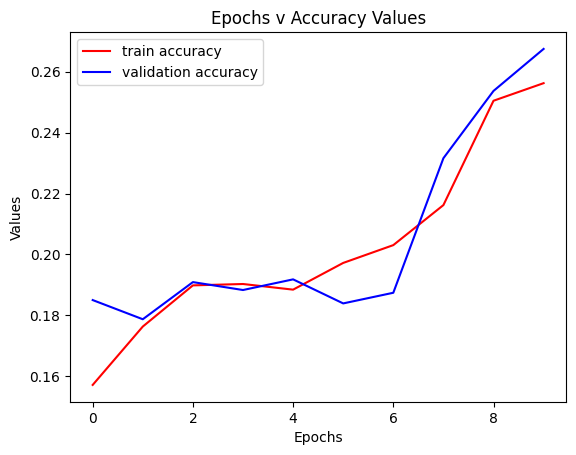

In [7]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

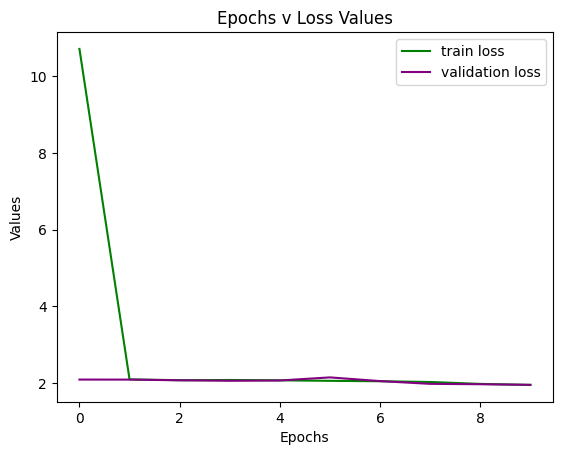

In [8]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()